In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv("customer_segmentation_clean.csv")

data.head()

,Total_Orders,Total_Quantity,Total_Revenue,Avg_Discount,Avg_Profit,Avg_Shipping,Recency
0,2,2,293,0.30,83.55,8.35,24
1,1,2,298,0.10,66.00,6.60,132
2,1,4,340,0.50,1.60,0.20,144
3,2,3,660,0.15,134.50,13.45,144
4,1,1,159,0.30,74.20,7.40,227


In [4]:
data.shape

(38990, 7)

In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

scaled_df.head()

,Total_Orders,Total_Quantity,Total_Revenue,Avg_Discount,Avg_Profit,Avg_Shipping,Recency
0,1.172101,-0.563803,-0.505751,-0.034258,0.287059,0.285785,-1.236203
1,-0.539646,-0.563803,-0.493739,-1.668764,-0.099661,-0.099911,-0.115358
2,-0.539646,0.308924,-0.392840,1.600248,-1.518736,-1.510455,0.009180
3,1.172101,-0.127440,0.375916,-1.260137,1.409759,1.409812,0.009180
4,-0.539646,-1.000166,-0.827667,-0.034258,0.081029,0.076407,0.870570


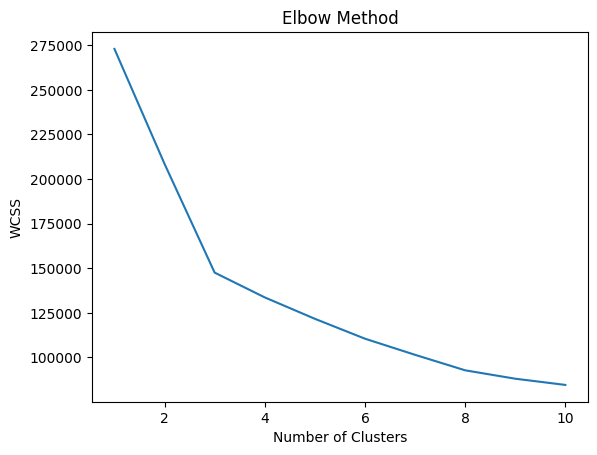

In [6]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

data["Cluster"] = clusters

data.head()

,Total_Orders,Total_Quantity,Total_Revenue,Avg_Discount,Avg_Profit,Avg_Shipping,Recency,Cluster
0,2,2,293,0.30,83.55,8.35,24,2
1,1,2,298,0.10,66.00,6.60,132,1
2,1,4,340,0.50,1.60,0.20,144,1
3,2,3,660,0.15,134.50,13.45,144,2
4,1,1,159,0.30,74.20,7.40,227,1


In [8]:
data["Cluster"].value_counts()

Cluster
1    17984
2    13955
0     7051
Name: count, dtype: int64

In [9]:
cluster_summary = data.groupby("Cluster").mean()
cluster_summary

,Total_Orders,Total_Quantity,Total_Revenue,Avg_Discount,Avg_Profit,Avg_Shipping,Recency
Cluster,,,,,,,
0,2.298397,6.726989,1049.910651,0.302892,70.545444,7.054813,88.529854
1,1.098476,2.540147,252.334520,0.295082,31.837603,3.186232,155.946286
2,1.097886,2.525475,551.159799,0.316589,120.365399,12.036138,154.160516


In [10]:
# Rename clusters for clarity
cluster_labels = {
    0: "High Value Active",
    1: "Low Value Dormant",
    2: "High Profit Potential"
}

data["Segment"] = data["Cluster"].map(cluster_labels)

data.head()

,Total_Orders,Total_Quantity,Total_Revenue,Avg_Discount,Avg_Profit,Avg_Shipping,Recency,Cluster,Segment
0,2,2,293,0.30,83.55,8.35,24,2,High Profit Potential
1,1,2,298,0.10,66.00,6.60,132,1,Low Value Dormant
2,1,4,340,0.50,1.60,0.20,144,1,Low Value Dormant
3,2,3,660,0.15,134.50,13.45,144,2,High Profit Potential
4,1,1,159,0.30,74.20,7.40,227,1,Low Value Dormant


In [11]:
data.to_csv("customer_segmented_final.csv", index=False)